In [1]:
import keras
import sys
import h5py
import numpy as np
from matplotlib import pyplot as plt
import tensorflow.keras.backend as K


Using TensorFlow backend.


In [2]:


def data_loader(filepath):
    data = h5py.File(filepath, 'r')
    x_data = np.array(data['data'])
    y_data = np.array(data['label'])
    x_data = x_data.transpose((0,2,3,1))

    return x_data, y_data

def data_preprocess(x_data):
    return x_data/255

def main():
    x_test, y_test = data_loader(clean_data_filename)
    x_test = data_preprocess(x_test)

    bd_model = keras.models.load_model(model_filename)

    clean_label_p = np.argmax(bd_model.predict(x_test), axis=1)
    class_accu = np.mean(np.equal(clean_label_p, y_test))*100
    print('Classification accuracy:', class_accu)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Classification accuracy: 99.99220576773187


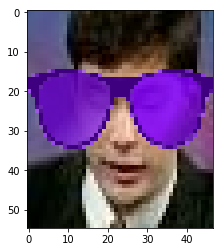

In [3]:
clean_data_filename = "../data/sunglasses_poisoned_data.h5"
model_filename = "../models/sunglasses_bd_net.h5"

x_test, y_test = data_loader(clean_data_filename)
x_test = data_preprocess(x_test)

for i in range(3):
    plt.imshow(x_test[i])

bd_model = keras.models.load_model(model_filename)

clean_label_p = np.argmax(bd_model.predict(x_test), axis=1)
class_accu = np.mean(np.equal(clean_label_p, y_test))*100
print('Classification accuracy:', class_accu)

In [4]:
bd_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              (None, 55, 47, 3)    0                                            
__________________________________________________________________________________________________
conv_1 (Conv2D)                 (None, 52, 44, 20)   980         input[0][0]                      
__________________________________________________________________________________________________
pool_1 (MaxPooling2D)           (None, 26, 22, 20)   0           conv_1[0][0]                     
__________________________________________________________________________________________________
conv_2 (Conv2D)                 (None, 24, 20, 40)   7240        pool_1[0][0]                     
____________________________________________________________________________________________

In [5]:
def get_layer_output(model, x, layer_name):
    """
    get the computing result output of any layer you want, default the last layer.
    :param model: primary model
    :param x: input of primary model( x of model.predict([x])[0])
    :param index: index of target layer, i.e., layer[23]
    :return: result
    """
    layer = K.function([model.input], [model.get_layer(layer_name).output])
    return layer([x])[0]


In [6]:
bd_model = keras.models.load_model(model_filename)

In [20]:
data_filename = "../data/sunglasses_poisoned_data.h5"
x_test, y_test = data_loader(data_filename)
x_test = data_preprocess(x_test)
# contribution_output = get_layer_output(bd_model, x_test, 'add_1')
contribution_output = get_layer_output(bd_model, x_test, 'activation_1')
cont_bd = np.mean(contribution_output, axis=0)

In [21]:
data_filename = "../data/clean_test_data.h5"
x_test, y_test = data_loader(data_filename)
x_test = data_preprocess(x_test)
contribution_output = get_layer_output(bd_model, x_test, 'activation_1')
cont_clean = np.mean(contribution_output, axis=0)

In [58]:
import pandas as pd
from matplotlib import colors
%matplotlib inline

In [24]:
df = pd.DataFrame(data={"clean": cont_clean, "poisoned": cont_bd})

In [25]:
df['diff'] = df['clean'] - df['poisoned']

In [ ]:
clean_viz = df['clean'].values.reshape(16, 10)

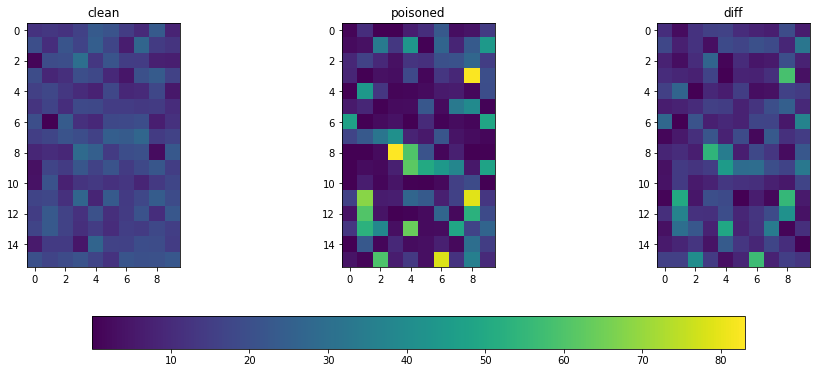

In [67]:
fig, axis = plt.subplots(1, 3, figsize=(16, 6))
a = df['clean'].values.reshape(16, 10)
b = df['poisoned'].values.reshape(16, 10)
c = df['diff'].abs().values.reshape(16, 10)
images = [axis[0].imshow(a), axis[1].imshow(b), axis[2].imshow(c)]
axis[0].set_title("clean")
axis[1].set_title("poisoned")
axis[2].set_title("diff")

vmin = min(image.get_array().min() for image in images)
vmax = max(image.get_array().max() for image in images)
norm = colors.Normalize(vmin=vmin, vmax=vmax)
for im in images:
    im.set_norm(norm)
fig.colorbar(images[0], ax=axis, orientation='horizontal', fraction=.1)
    
def update(changed_image):
    for im in images:
        if (changed_image.get_cmap() != im.get_cmap()
                or changed_image.get_clim() != im.get_clim()):
            im.set_cmap(changed_image.get_cmap())
            im.set_clim(changed_image.get_clim())
            
for im in images:
    im.callbacksSM.connect('changed', update)

plt.show()

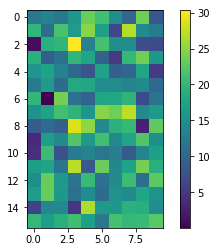

In [53]:
clean_viz = df['clean'].values.reshape(16, 10)
imgplot = plt.imshow(clean_viz)

plt.colorbar()

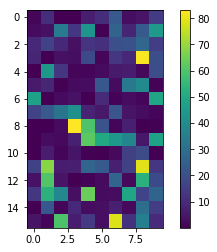

In [54]:
clean_viz = df['poisoned'].values.reshape(16, 10)
imgplot = plt.imshow(clean_viz)

plt.colorbar()

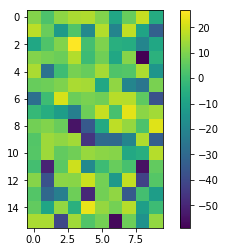

In [56]:
clean_viz = df['diff'].values.reshape(16, 10)
imgplot = plt.imshow(clean_viz)

plt.colorbar()